In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['figure.figsize'] = 8, 8
from IPython.display import Image

In [2]:
from scipy.stats import beta, binom
import pymc3 as pm
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Exercises

### Exercise 7.1. 
[Purpose: Experiment with the Metropolis algorithm as displayed in Figure 7.4.] Open the program named BernMetrop.R from the files hat accompany this book. The script implements a Metropolis algorithm for Figure 7.4 Midway through the script, you will find a line that specifies the SD of the proposal distribution:

proposalSD = c(0.02,0.2,2.0)[2]

The line may look strange but it’s merely a vector of constants with an index at the end to specify which component should be used. Thus, it’s a simple way of specifying three options and then selecting one option. Run the script three times, once with each option (i.e., once with [1], once with [2], and once with [3]). There is also a line that specifies the seed for the random number generator; comment it out so that you get a different trajectory than the ones shown in Figure 7.4. Notice at the end of the script that you can specify the format of the graphic file for saving the resulting graph. Include the graphs in your write-up and describe whether they show similar behavior as the corresponding trajectories in Figure 7.4. Be sure to discuss the ESS.


In [126]:
z = 14
N = 20
a, b = 1, 1

thetas = np.linspace(0,1,1001)

with pm.Model() as model:
    samples = 1000
    # prior
    p = pm.Beta('p', a, b)
    # likelihood
    y = pm.Binomial('y', n=N, p=p, observed=z)
    
    step1 = pm.Metropolis(S=np.array([0.02]))
    step2 = pm.Metropolis(S=np.array([0.2]))
    step3 = pm.Metropolis(S=np.array([2]))

    trace1 = pm.sample(50000, step=step1, progressbar=True, chains=2)
    trace2 = pm.sample(50000, step=step2, progressbar=True, chains=2)
    trace3 = pm.sample(50000, step=step3, progressbar=True, chains=2)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_logodds__]
100%|██████████| 50500/50500 [00:06<00:00, 7452.92it/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_logodds__]
100%|██████████| 50500/50500 [00:06<00:00, 7760.76it/s]
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_logodds__]
100%|██████████| 50500/50500 [00:06<00:00, 8273.63it/s]
The number of effective samples is smaller than 25% for some parameters.


In [130]:
effs1 = pm.effective_n(trace1)['p']
effs2 = pm.effective_n(trace2)['p']
effs3 = pm.effective_n(trace3)['p']

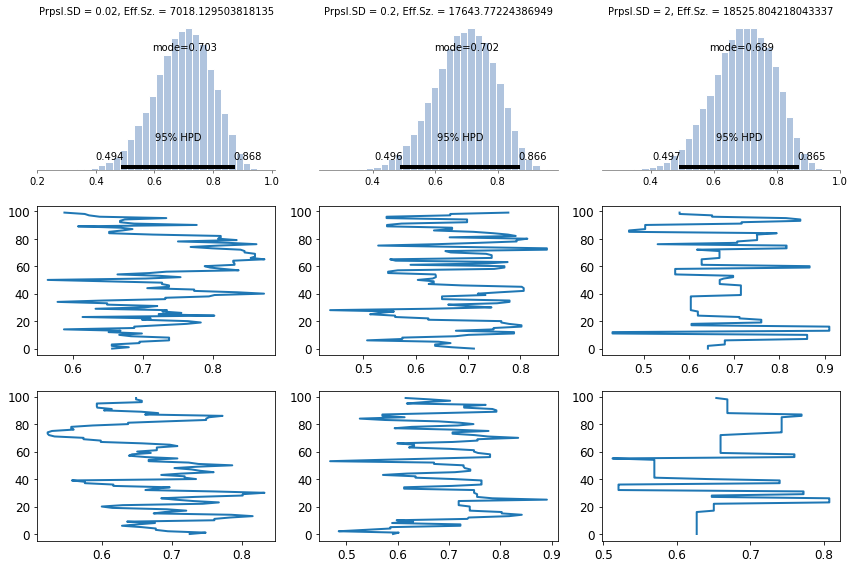

In [142]:
fig, axs = plt.subplots(3,3, figsize=(12, 8))

x = [i for i in range(100)]

pm.plots.plot_posterior(trace1, label='post', color = 'lightsteelblue', ax = axs[0,0], point_estimate = 'mode')
axs[0,0].set_title('Prpsl.SD = 0.02, Eff.Sz. = {}'.format(effs1), fontsize=10)
axs[1,0].plot(trace1['p'][:100], x)
axs[2,0].plot(trace1['p'][49900:50000], x)

pm.plots.plot_posterior(trace2, label='post', color = 'lightsteelblue', ax = axs[0,1], point_estimate = 'mode')
axs[0,1].set_title('Prpsl.SD = 0.2, Eff.Sz. = {}'.format(effs2), fontsize=10)
axs[1,1].plot(trace2['p'][:100], x)
axs[2,1].plot(trace2['p'][49900:50000], x)

pm.plots.plot_posterior(trace3, label='post', color = 'lightsteelblue', ax = axs[0,2], point_estimate = 'mode')
axs[0,2].set_title('Prpsl.SD = 2, Eff.Sz. = {}'.format(effs3), fontsize=10)
axs[1,2].plot(trace3['p'][:100], x)
axs[2,2].plot(trace3['p'][49900:50000], x)


### Exercise 7.2. 
[Purpose: To explore the autocorrelation function in Fig- ure 7.12.] At the end of the script BernMetrop.R, add these lines:


In [173]:
import statsmodels.api as sm
acf_list = sm.tsa.stattools.acf(trace1['p'], nlags=10)
acf_lag_1 = acf_list[1]
acf_lag_5 = acf_list[5]
acf_lag_10 = acf_list[10]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f1416a0>,
      dtype=object)

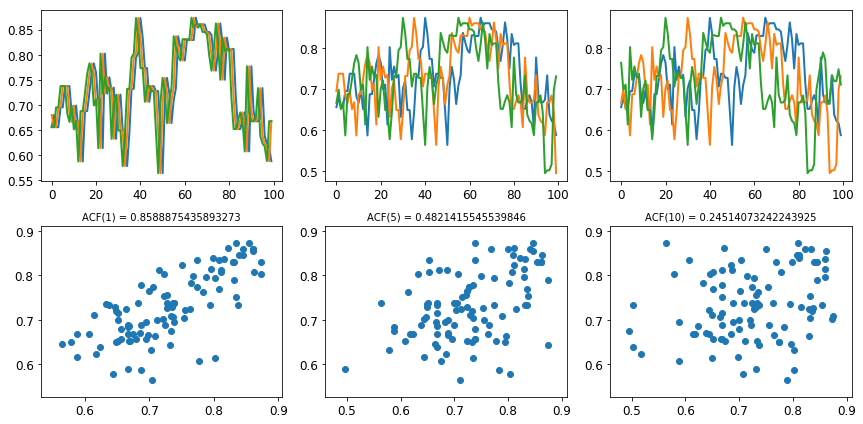

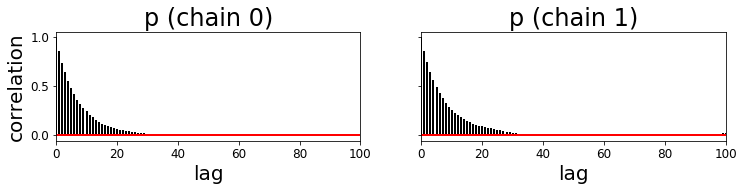

In [178]:
fig, axs = plt.subplots(2,3, figsize=(12, 6))

axs[0,0].plot(trace1['p'][:100])
axs[0,0].plot(trace1['p'][1:101])
axs[0,0].plot(trace1['p'][2:102])
axs[1,0].scatter(trace1['p'][1:101], trace1['p'][:100])
axs[1,0].set_title('ACF(1) = {}'.format(acf_lag_1), fontsize=10)

axs[0,1].plot(trace1['p'][:100])
axs[0,1].plot(trace1['p'][5:105])
axs[0,1].plot(trace1['p'][10:110])
axs[1,1].scatter(trace1['p'][5:105], trace1['p'][:100])
axs[1,1].set_title('ACF(5) = {}'.format(acf_lag_5), fontsize=10)

axs[0,2].plot(trace1['p'][:100])
axs[0,2].plot(trace1['p'][10:110])
axs[0,2].plot(trace1['p'][20:120])
axs[1,2].scatter(trace1['p'][10:110], trace1['p'][:100])
axs[1,2].set_title('ACF(10) = {}'.format(acf_lag_10), fontsize=10)
plt.tight_layout()
pm.autocorrplot(trace1)

